In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('numerical (1).csv')
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,4.248495,32,5,0,1,5.955348
1,6979.535903,0,4.553877,13,42,0,8,7.032152
2,12887.431650,48767,4.691348,18,38,0,2,6.341192
3,7645.861827,0,4.672829,18,65,0,7,6.274539
4,2813.692575,43836,4.304065,12,44,0,1,4.935415
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,4.304065,18,89,0,2,5.294484
9130,3096.511217,21604,4.382027,14,28,0,1,5.940697
9131,8163.890428,0,4.454347,9,37,3,2,6.674290
9132,7524.442436,21941,4.574711,34,3,0,3,6.539875


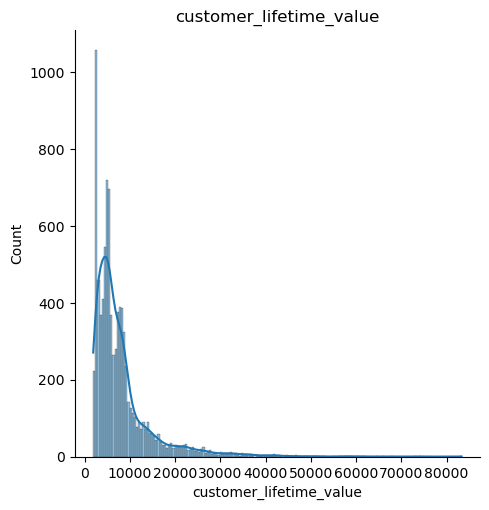

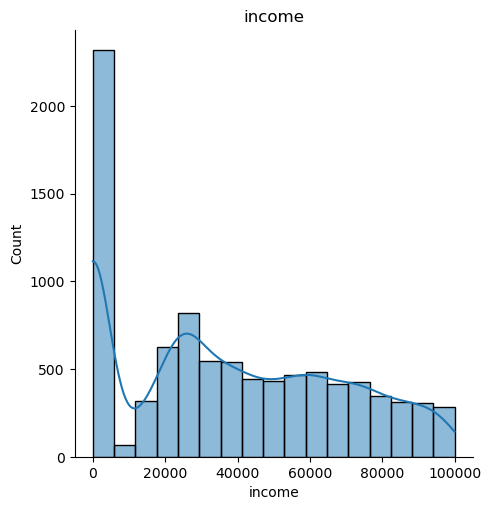

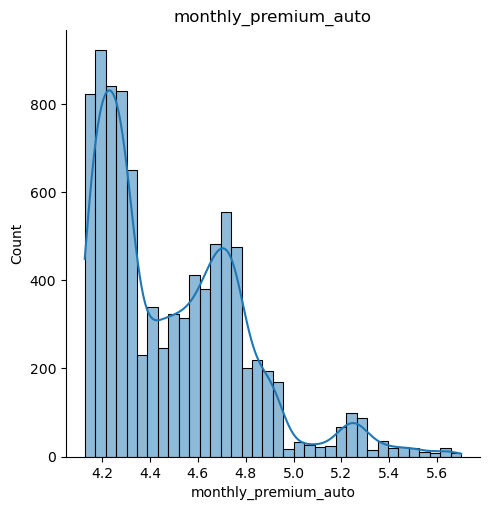

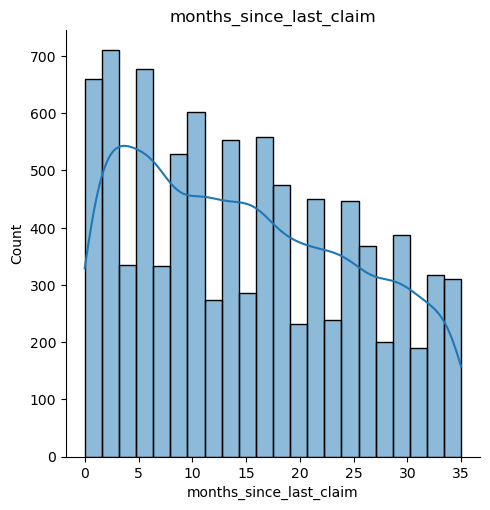

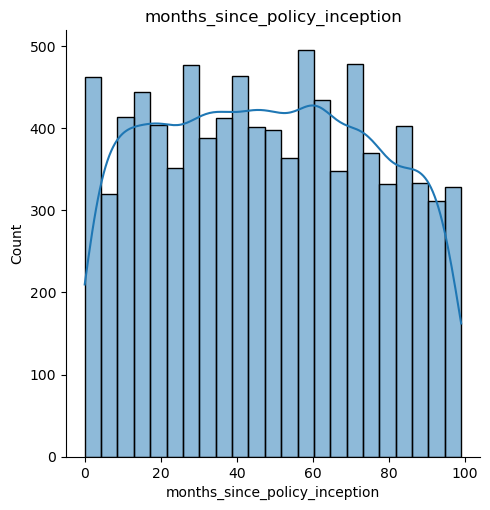

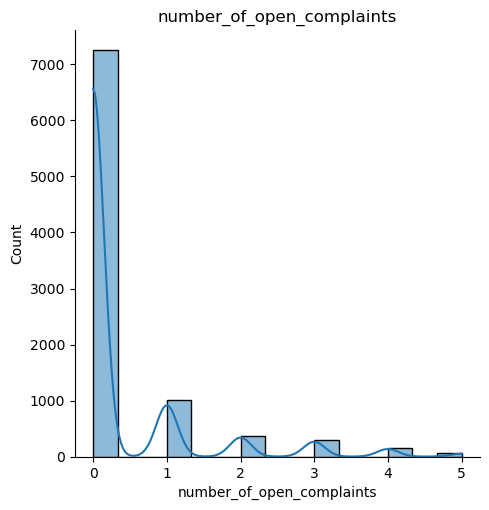

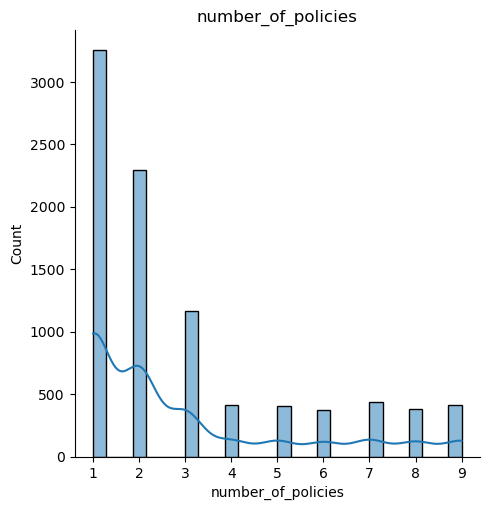

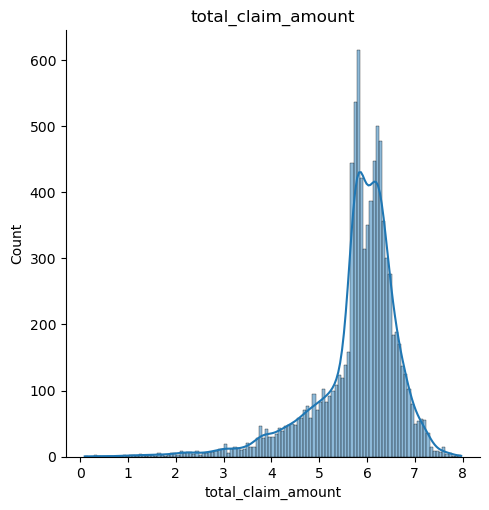

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_df(df):
    for col in df.columns:
        sns.displot(df[col], kde=True)
        plt.title(col)
        plt.show()

plot_df(data)

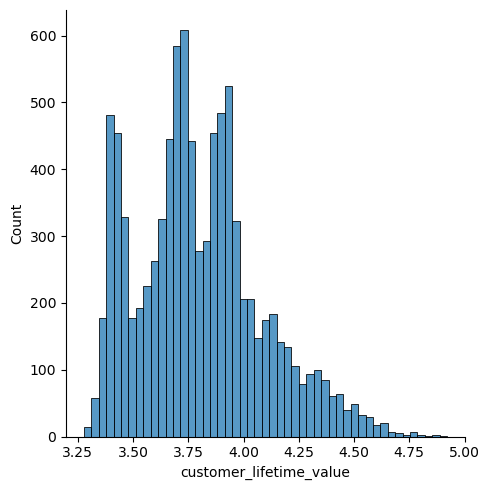

In [4]:
def log_transform(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

customer_lifetime_value_log = data['customer_lifetime_value'].apply(log_transform)
sns.displot(customer_lifetime_value_log)
plt.show()

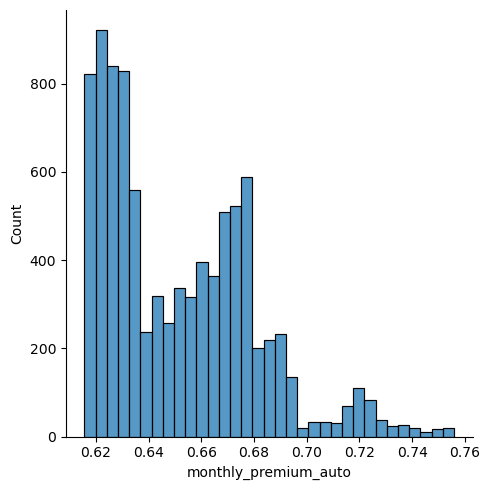

In [5]:
monthly_premium_auto_log = data['monthly_premium_auto'].apply(log_transform)
sns.displot(monthly_premium_auto_log)
plt.show()

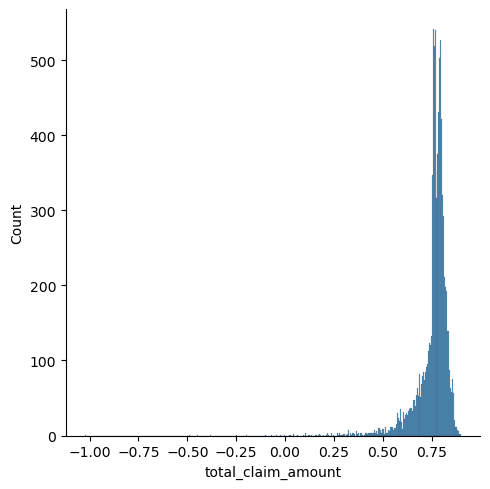

In [6]:
total_claim_amount_log = data['total_claim_amount'].apply(log_transform)
sns.displot(total_claim_amount_log)
plt.show()

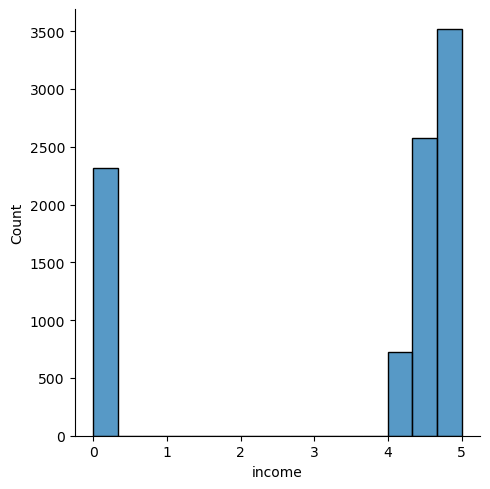

In [7]:
income_log = data['income'].apply(log_transform)
sns.displot(income_log)
plt.show()

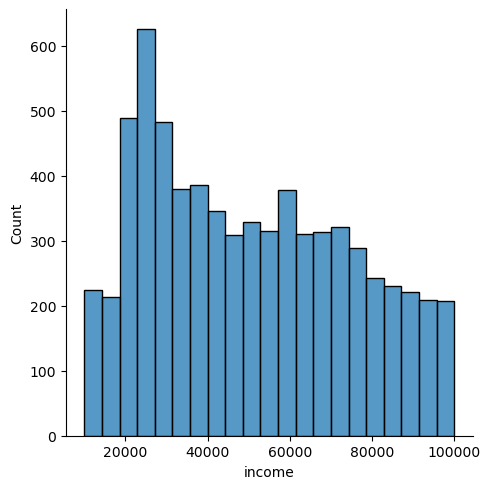

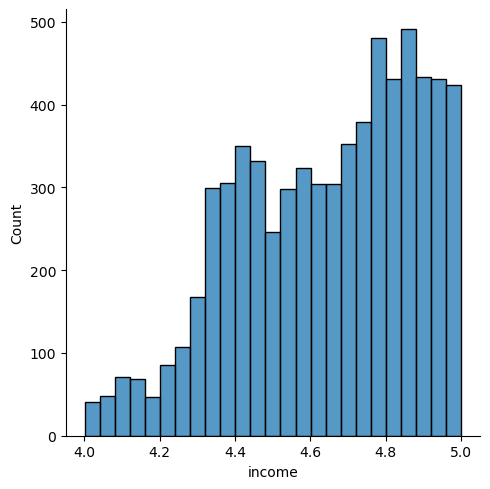

In [8]:
income_filtered = data['income'][data['income']>0]
sns.displot(income_filtered)
plt.show()

income_filtered_log = income_filtered.apply(log_transform)
sns.displot(income_filtered_log)
plt.show()

In [9]:
customer_lifetime_value_log.describe()

count    9134.000000
mean        3.799452
std         0.283559
min         3.278298
25%         3.601435
50%         3.761942
75%         3.952413
max         4.920777
Name: customer_lifetime_value, dtype: float64

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_13304/69923717.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_lifetime_value_log, bins=30)
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_13304/69923717.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bin

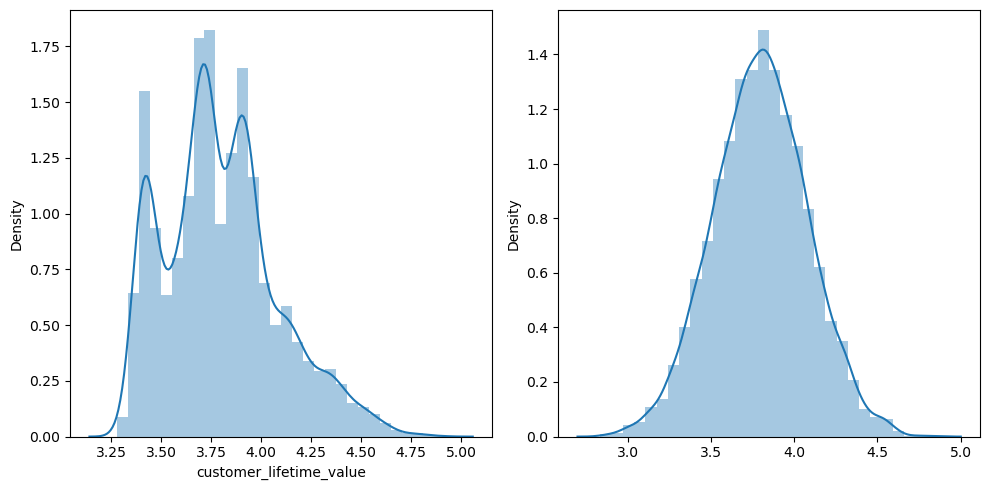

In [10]:
x = np.random.normal(3.799452,0.283559,9134)

plt.figure(figsize=(10, 5))
    
plt.subplot(1,2,1)
sns.distplot(customer_lifetime_value_log, bins=30)
    
plt.subplot(1,2,2)
sns.distplot(x, bins=30)
    
plt.tight_layout()
plt.show()

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_13304/151325655.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_claim_amount_log, bins=30)
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_13304/151325655.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, bins=

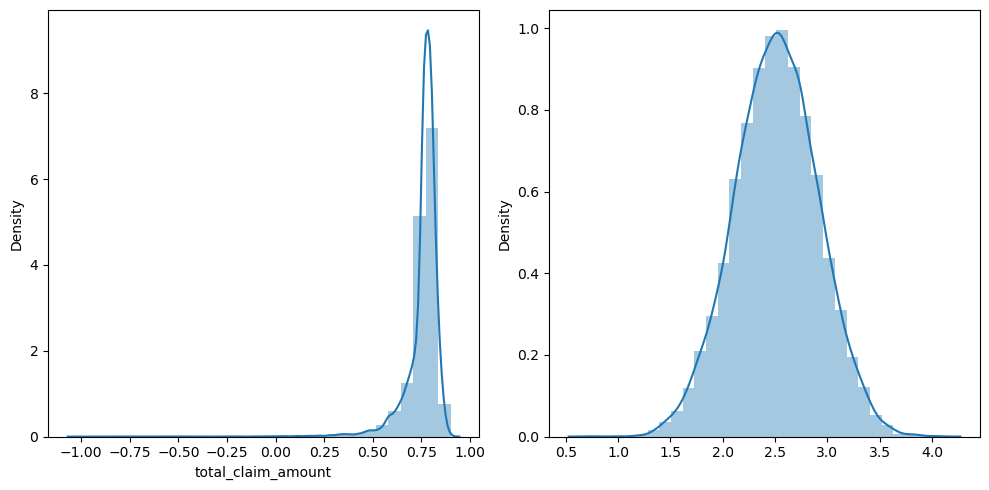

In [11]:
x2 = np.random.normal(2.514750,0.398051,9134)

plt.figure(figsize=(10, 5))
    
plt.subplot(1,2,1)
sns.distplot(total_claim_amount_log, bins=30)
    
plt.subplot(1,2,2)
sns.distplot(x2, bins=30)
    
plt.tight_layout()
plt.show()